# Missing Value Handling

While training any model based on a data a common problem we come across is "Missing Value". It is very difficult to train a model with missing values. There are certain techniques to handle the issing values. 

#### There are mainly three types of Missing values we will encounter with:

- **MCAR -- Missing Completely at Random**
  - *The probability of missingness is independent of both observed and unobserved data.*
  - *There is no systematic pattern to why values are missing.*
  - *Example: A survey respondent accidentally skips a question due to a random oversight.*
- **MAR -- Missing at Random**
  - *The probability of missingness depends on observed data but not on unobserved (missing) data.*
  - *Example: In a medical study, older patients may be less likely to report income, but given their age, missingness does not depend on the income itself.*
- **MNAR -- Missing not at Random**
  - *The probability of missingness depends on the unobserved (missing) values themselves.*
  - *Example: People with severe depression might be less likely to participate in a mental health study, leading to bias in missing data.*

#### There are differnet ways are there to deal with missing values.

#### Missing Value

- **Remove rows with missing values**
- **Impute Values**
  - **Univariate Imputation**
    - **Numerical Data**
      - **Mean/Median Imputation**
      - **Random Impuation**
      - **End of Distribution Imputation**
    - **Categorical Imputation**
      - **Mode Imputation**
      - **Missing Column Formation and Random Imputation**
  - **Multivariate Imputation**
    - **KNN Imputer**
    - **Iterative Imputer(MICE)**
      


### Remove Rows with Missing Values

##### This is also known as **CCA (Complete Case Analysis)**.
*Complete Case Analysis also called "list-wise detection" of cases, consists in discarding obsevations where values in any column are missing.*
*CCA literally means analysing only those values for which there is information in all of the columns in dataset.*
##### When to use?
- **Can only be applied if Missing Completely at random.**
- **If percentage of missing values is < 5%**

In [8]:
import pandas as pd 
import numpy as np

In [9]:
df = pd.read_csv('Wine_Quality.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1940,white,8.3,0.36,0.57,15.0,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
6125,red,9.0,0.58,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
2812,white,6.7,0.16,0.34,1.6,0.026,27.0,109.0,0.99340,3.34,0.58,10.1,6
1272,white,7.0,0.39,0.31,5.3,0.169,32.0,162.0,0.99650,3.20,0.48,9.4,5
1937,white,7.3,0.13,0.27,4.6,0.080,34.0,172.0,0.99380,3.23,0.39,11.1,7


In [12]:
df.isnull().mean()*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

##### Here we can observe there are missing values in 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates' columns. 
##### Every column has < 5% missing values.
##### Hence we can apply CCA.

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Uinvariate Imputation
*In Univariate Imputation, only the column containing the missing values is used to fill in the missing data.*

**Numerical Data**
- **Mean/Median Imputation**
: *Here we replace the missing values by mean/median of the column*
  - ##### When to use?
    - *Can only be applied if Missing Completely at random.*
    - *If percentage of missing values is < 5%*
    - *Use Mean/Median Imputation if the data is symmetrical*
    - *Use Median Imputation for skewed distribution*
  - ##### Check that variance doesn't change much after imputation
  - ##### Demerits:
    - *Can cahnge the shape of the distribution*
    - *New outlires introduced*

In [18]:
df = pd.read_csv('Wine_Quality.csv')
df_num = df.drop(['type'], axis = 1)

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
si_mean = SimpleImputer(strategy='mean')

si_mean.fit_transform(df_num)

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [21]:
df_mean = pd.DataFrame(si_mean.fit_transform(df_num))

print("Variance before imputation\tVariance after imputation\n")
for i in range(len(df_num.columns)):
    print(round(np.var(df_num.iloc[:,i-1]),4), '\t\t\t\t', round(np.var(df_mean.iloc[:,i-1]),4))


Variance before imputation	Variance after imputation

0.7625 				 0.7625
1.6813 				 1.6787
0.0271 				 0.0271
0.0211 				 0.0211
22.6363 				 22.6293
0.0012 				 0.0012
314.9927 				 314.9927
3194.2283 				 3194.2283
0.0 				 0.0
0.0258 				 0.0258
0.0221 				 0.0221
1.4223 				 1.4223


In [22]:
si_median = SimpleImputer(strategy = 'median')

si_median.fit_transform(df_num)

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [23]:
df_median = pd.DataFrame(si_median.fit_transform(df_num))

print("Variance before imputation\tVariance after imputation\n")
for i in range(len(df_num.columns)):
    print(round(np.var(df_num.iloc[:,i-1]),4), '\t\t\t\t', round(np.var(df_median.iloc[:,i-1]),4))


Variance before imputation	Variance after imputation

0.7625 				 0.7625
1.6813 				 1.6788
0.0271 				 0.0271
0.0211 				 0.0211
22.6363 				 22.6311
0.0012 				 0.0012
314.9927 				 314.9927
3194.2283 				 3194.2283
0.0 				 0.0
0.0258 				 0.0258
0.0221 				 0.0221
1.4223 				 1.4223


##### After imputation it is clear that the variance of the columns with missing values decreases. But there is no significant change

In [25]:
import matplotlib.pyplot as plt

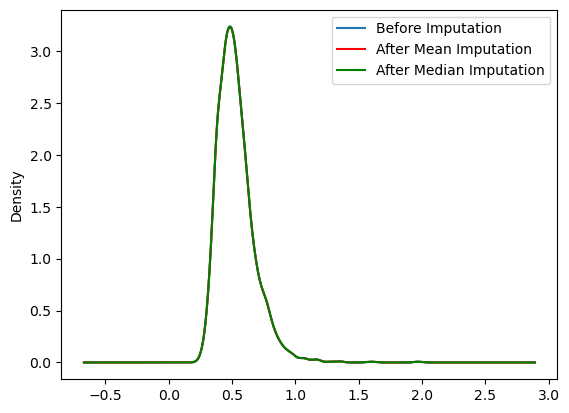

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df_num['sulphates'].plot(kind='kde', ax=ax)

# variable imputed with the median
df_mean.iloc[:,9].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df_median.iloc[:,9].plot(kind='kde', ax=ax, color='green')

# add legends
lines = ax.get_legend_handles_labels()[0]
labels = ('Before Imputation', 'After Mean Imputation', 'After Median Imputation')
ax.legend(lines, labels, loc='best')

##### Shape of the distribution remains unchanged.

- **Arbitrary Value Imputation**: *This process helps the model to recognize missing data pattarns*
- *In this method we replace the missing values by arbitrary higher or lower value*
- **When to use?**
  - *When data is not missing at random*

In [29]:
df = pd.read_csv('Wine_Quality.csv')
df_num = df.drop(['type'], axis = 1)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [30]:
df_num.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [31]:
trf1 = SimpleImputer(strategy = 'constant', fill_value = 30)
trf2 = SimpleImputer(strategy = 'constant', fill_value = 5)
trf3 = SimpleImputer(strategy = 'constant', fill_value = 5)
trf4 = SimpleImputer(strategy = 'constant', fill_value = 80)
trf5 = SimpleImputer(strategy = 'constant', fill_value = 3)
trf6 = SimpleImputer(strategy = 'constant', fill_value = 9)
trf7 = SimpleImputer(strategy = 'constant', fill_value = 5)

In [32]:
from sklearn.compose import ColumnTransformer

In [33]:
trf = ColumnTransformer([
    ('imputer1', trf1, ['fixed acidity']),
    ('imputer2', trf2, ['volatile acidity']),
    ('imputer3', trf3, ['citric acid']),
    ('imputer4', trf4, ['residual sugar']),
    ('imputer5', trf5, ['chlorides']),
    ('imputer6', trf6, ['pH']),
    ('imputer7', trf7, ['sulphates'])],
                 remainder = 'passthrough')
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=30,
                                               strategy='constant'),
                                 ['fixed acidity']),
                                ('imputer2',
                                 SimpleImputer(fill_value=5,
                                               strategy='constant'),
                                 ['volatile acidity']),
                                ('imputer3',
                                 SimpleImputer(fill_value=5,
                                               strategy='constant'),
                                 ['citric acid']),
                                ('imputer4',
                                 SimpleImputer(fill_value=80,
                                               strategy='constant'),
                                 ['residual sugar']),
                                ('imputer5',
                                 SimpleImputer(fill_value=3,
                                               strategy='constant'),
                                 ['chlorides']),
                                ('imputer6',
                                 SimpleImputer(fill_value=9,
                                               strategy='constant'),
                                 ['pH']),
                                ('imputer7',
                                 SimpleImputer(fill_value=5,
                                               strategy='constant'),
                                 ['sulphates'])])

In [34]:
df_before_imputation = df_num.iloc[:,[0,1,2,3,4,8,9]]
df_arbitrary = pd.DataFrame(trf.fit_transform(df_num.iloc[:,[0,1,2,3,4,8,9]]))

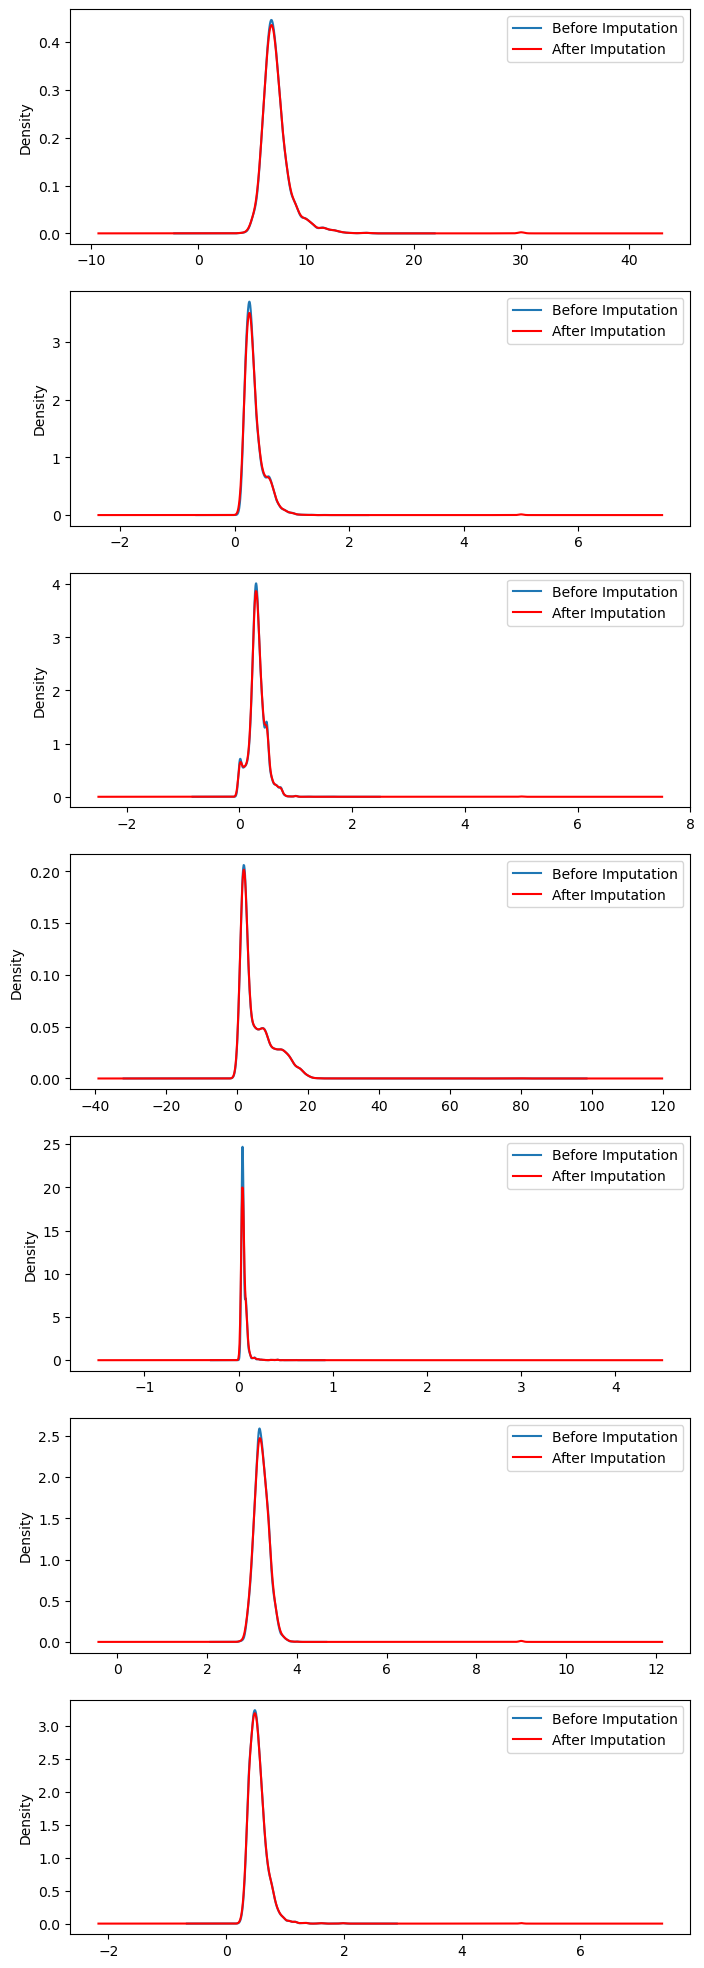

In [35]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8, 25))  # Adjust rows/cols as needed
axes = axes.flatten()

for i in range(len(df_arbitrary.columns)):
    ax = axes[i]
    
    # original variable distribution
    df_before_imputation.iloc[:, i].plot(kind='kde', ax=ax)

    df_arbitrary.iloc[:, i].plot(kind='kde', ax=ax, color='red')
    
    # add legends
    lines = ax.get_legend_handles_labels()[0]
    labels = ('Before Imputation', 'After Imputation')
    ax.legend(lines, labels, loc='best')

- **End of Distribution Imputation**: *This process helps the model to recognize missing data pattarns*
- *Like the previous method, in this method we replace the missing values by max and min*
- **When to use?**
  - *When data is not missing at random*
#### Similar as the previous one.

**Categorical Data**: 
- **Most Frequent Value Imputation**

In [38]:
df = pd.read_csv('Students_Performance.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               989 non-null    object
 2   parental level of education  979 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [40]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
249,male,group C,high school,NaN,none,68,60,53
828,female,group D,some high school,free/reduced,completed,69,86,81
593,female,group E,high school,standard,none,74,76,73
495,male,group D,high school,standard,completed,68,64,66
269,female,group E,some college,free/reduced,none,71,76,70


In [41]:
df.isnull().mean()*100

gender                         0.0
race/ethnicity                 1.1
parental level of education    2.1
lunch                          1.2
test preparation course        0.4
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [42]:
trf1 = SimpleImputer(strategy = 'most_frequent')
trf2 = SimpleImputer(strategy = 'most_frequent')
trf3 = SimpleImputer(strategy = 'most_frequent')
trf4 = SimpleImputer(strategy = 'most_frequent')

In [43]:
trf = ColumnTransformer([
    ('Imputer1', trf1, ['race/ethnicity']),
    ('Imputer2', trf2, ['parental level of education']),
    ('Imputer3', trf3, ['lunch']),
    ('Imputer4', trf4, ['test preparation course'])
])

In [44]:
df_before_imputation = df.iloc[:,[1,2,3,4]]

In [45]:
df_impute = pd.DataFrame(trf.fit_transform(df[['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]))

- **Missing Category Imputation**: *In this method we introduce a new category 'Missing'*

In [47]:
df = pd.read_csv('Students_Performance.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               989 non-null    object
 2   parental level of education  979 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
df_cat = df.iloc[:,:5]

In [50]:
si = SimpleImputer(strategy = 'constant', fill_value = 'Missing')
df_missing = pd.DataFrame(si.fit_transform(df_cat))

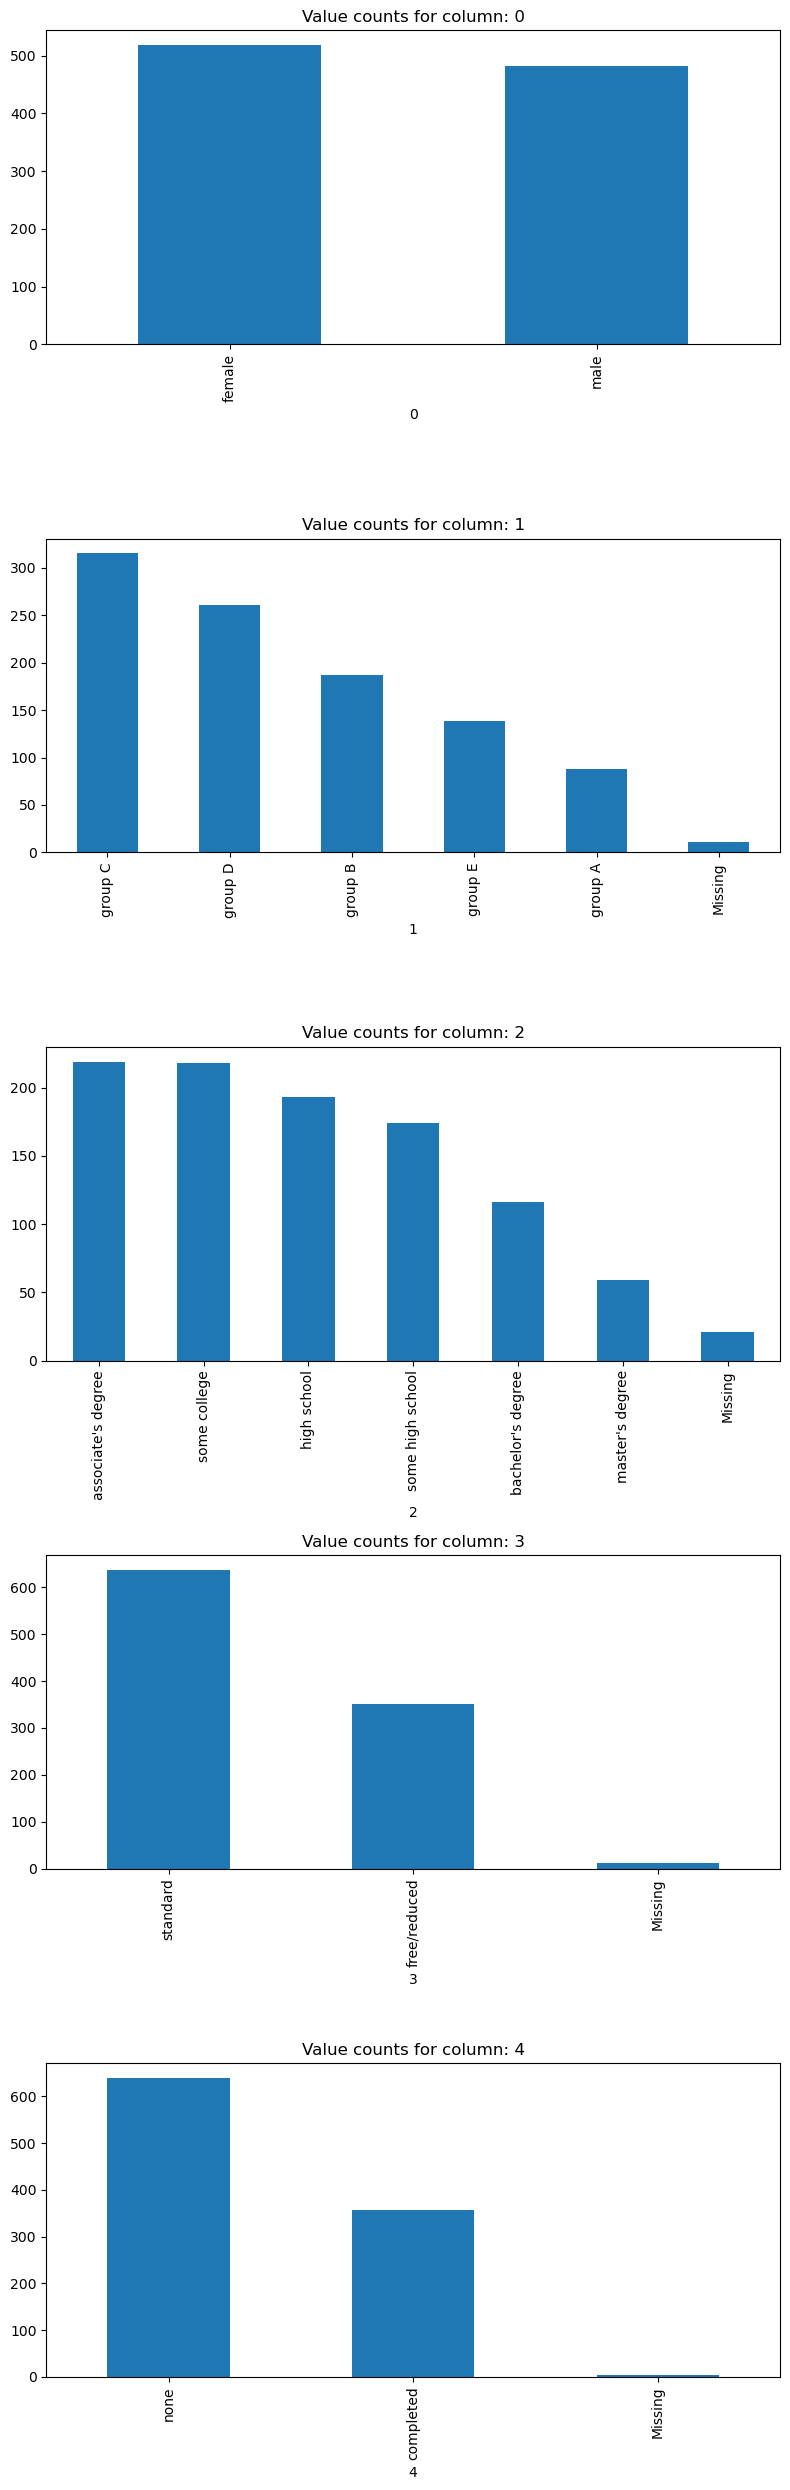

In [51]:
import matplotlib.pyplot as plt

# Create subplots (4 rows, 1 column)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 25))

# Flatten the axes array for easy access
axes = axes.flatten()

# Loop through the columns of df_missing and plot value counts
for i in range(len(df_missing.columns)):
    ax = axes[i]  # Select the i-th subplot axis
    
    # Plot the value counts of the i-th column as a bar chart
    df_missing.iloc[:, i].value_counts().plot(kind='bar', ax=ax)
    
    # Set the title for each subplot
    ax.set_title(f"Value counts for column: {df_missing.columns[i]}")

# Adjust the layout to make sure the subplots don't overlap
plt.tight_layout()
plt.show()


### Multivariate Imputation
*In Multivariate Imputation, the other columns are used to fill the missing values.*

**KNN Imputer**: *In this method we use k neighbours to fill the missing value*
- **Advantages**: *Shows better accuracy*
- **Disadvantages**: *Use the Train data to fill the missing value, hence it is slow, and use storage*

In [54]:
from sklearn.impute import KNNImputer

In [55]:
knn = KNNImputer(n_neighbors = 3, weights = 'uniform')
df_knn = pd.DataFrame(knn.fit_transform(df_num))

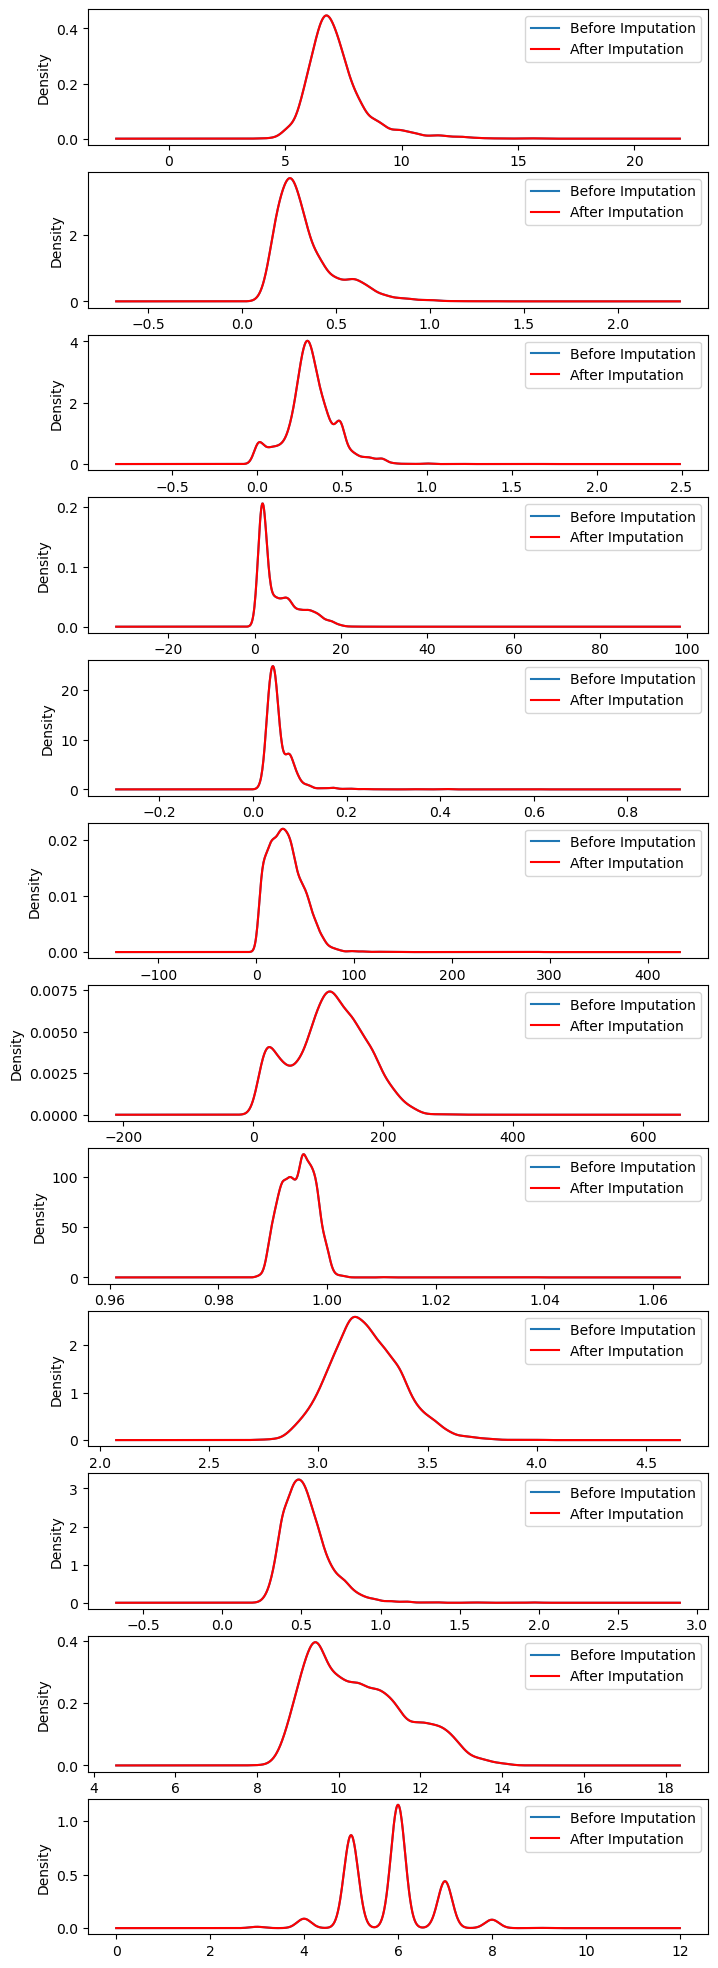

In [56]:
fig, axes = plt.subplots(nrows=len(df_knn.columns), ncols=1, figsize=(8, 25))  # Adjust rows/cols as needed
axes = axes.flatten()

for i in range(len(df_knn.columns)):
    ax = axes[i]
    
    # original variable distribution
    df_num.iloc[:, i].plot(kind='kde', ax=ax)

    df_knn.iloc[:, i].plot(kind='kde', ax=ax, color='red')
    
    # add legends
    lines = ax.get_legend_handles_labels()[0]
    labels = ('Before Imputation', 'After Imputation')
    ax.legend(lines, labels, loc='best')

**MICE (Multivariate Imputation by Chained Equation)**

*The MICE (Multiple Imputation by Chained Equations) method is a popular technique for handling missing data. It works by creating multiple imputed datasets through an iterative process.*

- **Initialization**: *Initially, missing values in a dataset are imputed using some method (mean, median, or a simple imputation).*

- **Iteration**: *For each variable with missing values*:

  - *The missing values are imputed using the values from other variables (those that are not missing).*

  - *This is done iteratively, and each iteration improves the estimates of the missing values.*

- **Multiple Imputations**: *The process is repeated multiple times to generate multiple different imputed datasets.*

- **Combining the Datasets**: *Once the imputation is complete, the multiple datasets are averaged to produce the final imputed dataset.*

**When to use?**
- *When data is MAR (Missing at Random)*

In [61]:
df_num.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [62]:
from fancyimpute import IterativeImputer

In [63]:
# Instantiate the MICE imputer
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply MICE to impute the missing values
df_mice = pd.DataFrame(mice_imputer.fit_transform(df_num))

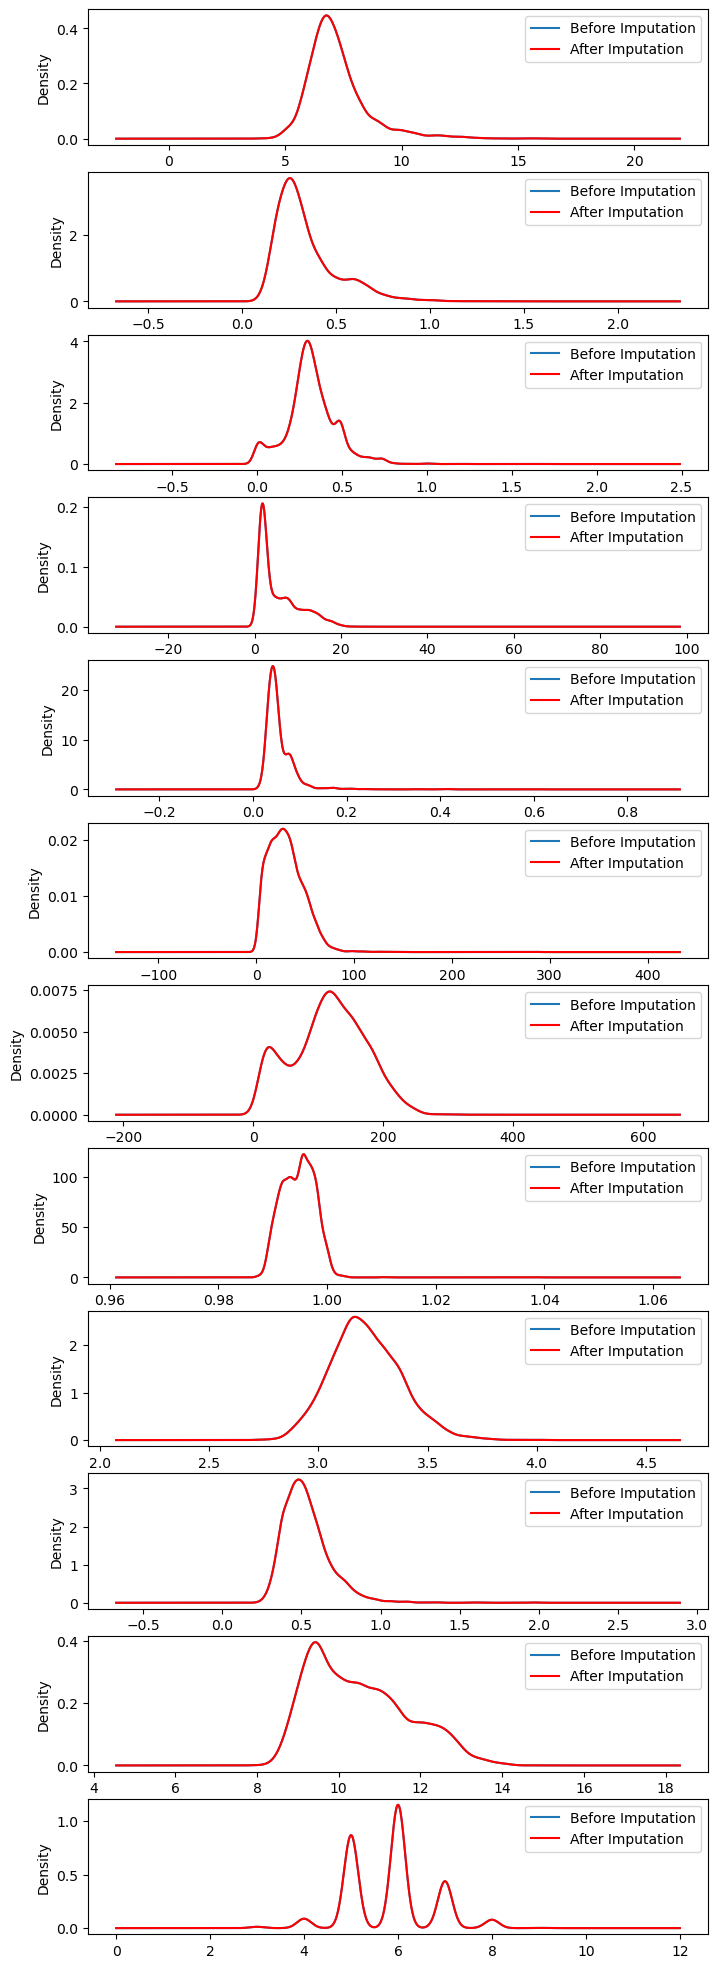

In [64]:
fig, axes = plt.subplots(nrows=len(df_knn.columns), ncols=1, figsize=(8, 25))  # Adjust rows/cols as needed
axes = axes.flatten()

for i in range(len(df_knn.columns)):
    ax = axes[i]
    
    # original variable distribution
    df_num.iloc[:, i].plot(kind='kde', ax=ax)

    df_mice.iloc[:, i].plot(kind='kde', ax=ax, color='red')
    
    # add legends
    lines = ax.get_legend_handles_labels()[0]
    labels = ('Before Imputation', 'After Imputation')
    ax.legend(lines, labels, loc='best')